<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


-   Identify the distribution of data in the dataset.

-   Identify outliers in the dataset.

-   Remove outliers from the dataset.

-   Identify correlation between features in the dataset.


* * *


## Hands on Lab


Import the pandas module.


In [11]:
import pandas as pd

Load the dataset into a dataframe.


In [13]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


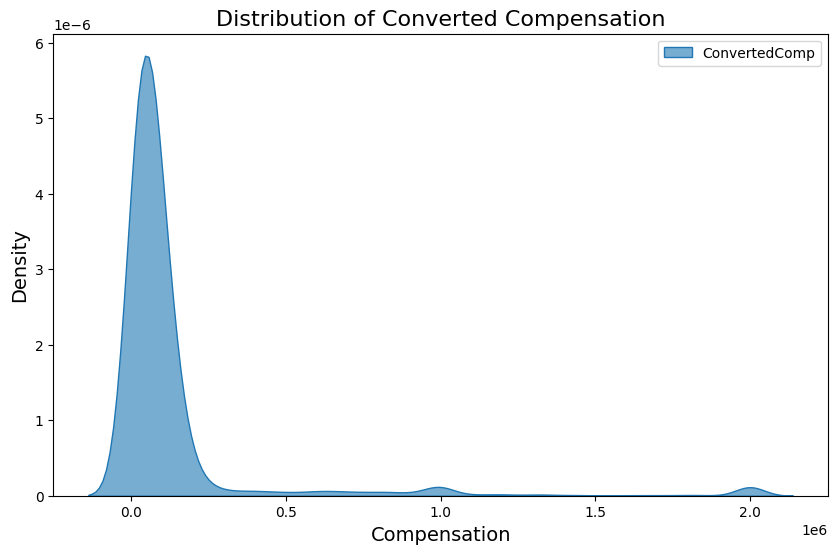

In [18]:
# your code goes 
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.kdeplot(df[['ConvertedComp']], fill=True, color="blue", alpha=0.6)

# Adding labels and title
plt.title('Distribution of Converted Compensation', fontsize=16)
plt.xlabel('Compensation', fontsize=14)
plt.ylabel('Density', fontsize=14)

# Show the plot
plt.show()


               

Plot the histogram for the column `ConvertedComp`.


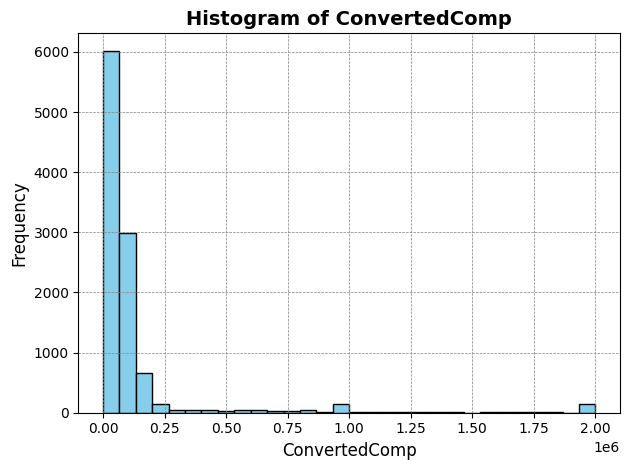

In [20]:
# your code goes here
def plot_histogram(data, column, bins=30, title=None, xlabel=None, ylabel='Frequency', color='skyblue', edge_color='black'):
   
    # Set up figure 
    fig, ax = plt.subplots()
    fig.patch.set_alpha(0.0)  

    # Plot histogram
    ax.hist(data[column], bins=bins, color=color, edgecolor=edge_color)

    # Set title and labels
    ax.set_title(f'Histogram of {title}' if title  else f'Histogram of {column}', fontsize=14, fontweight='bold')
    ax.set_xlabel(xlabel if xlabel else column, fontsize=12)
    ax.set_ylabel(ylabel, fontsize=12)

    # Style grid and layout
    ax.grid(visible=True, color='grey', linestyle='--', linewidth=0.5)
    plt.tight_layout()  

    # Show plot
    plt.show()

plot_histogram(df, 'ConvertedComp')

What is the median of the column `ConvertedComp`?


In [22]:
# your code goes here
df['ConvertedComp'].describe()

count    1.058200e+04
mean     1.315967e+05
std      2.947865e+05
min      0.000000e+00
25%      2.686800e+04
50%      5.774500e+04
75%      1.000000e+05
max      2.000000e+06
Name: ConvertedComp, dtype: float64

How many responders identified themselves only as a **Man**?


In [24]:
# your code goes here
df['Gender'].value_counts()

Gender
Man                                                            10480
Woman                                                            731
Non-binary, genderqueer, or gender non-conforming                 63
Man;Non-binary, genderqueer, or gender non-conforming             26
Woman;Non-binary, genderqueer, or gender non-conforming           14
Woman;Man                                                          9
Woman;Man;Non-binary, genderqueer, or gender non-conforming        2
Name: count, dtype: int64

Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [26]:
# your code goes here
women_df = df[df['Gender'] == 'Woman']
median_converted_comp = women_df['ConvertedComp'].median()

print(f"The median ConvertedComp for respondents identifying as 'Woman' is: {median_converted_comp}")

The median ConvertedComp for respondents identifying as 'Woman' is: 57708.0


Give the five number summary for the column `Age`?


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


In [29]:
# your code goes here
df['Age'].describe()

count    11111.000000
mean        30.778895
std          7.393686
min         16.000000
25%         25.000000
50%         29.000000
75%         35.000000
max         99.000000
Name: Age, dtype: float64

Plot a histogram of the column `Age`.


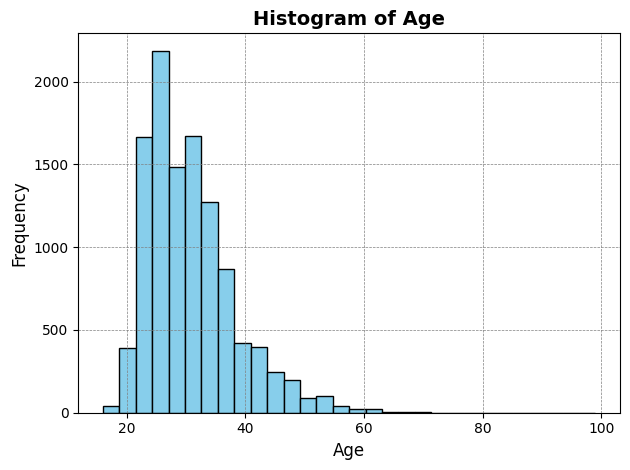

In [31]:
# your code goes here
plot_histogram(df, 'Age')

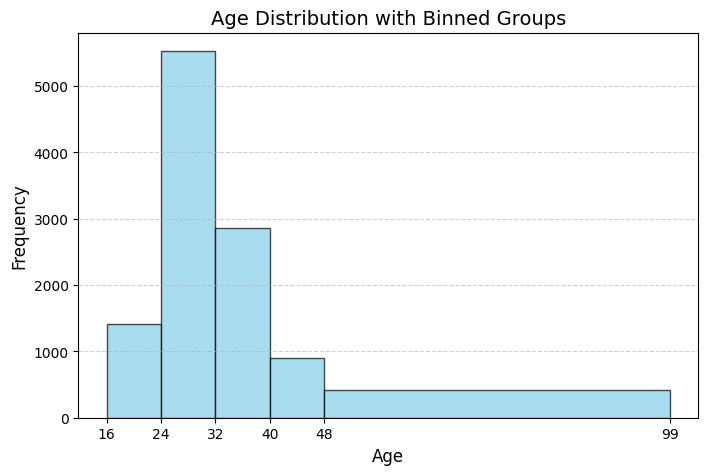

In [32]:
bins = [16, 24, 32, 40, 48, df['Age'].max()]
labels = ['16-24', '24-32', '32-40', '40-48', '48-over']

# Create a new column for the age group
df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Plot a histogram
plt.figure(figsize=(8, 5))
plt.hist(df['Age'], bins=bins, edgecolor='black', color='skyblue', alpha=0.7)
plt.title('Age Distribution with Binned Groups', fontsize=14)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(bins)
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Show the plot
plt.show()

## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


Text(0.5, 1.0, 'Box Plot for ConvertedComp')

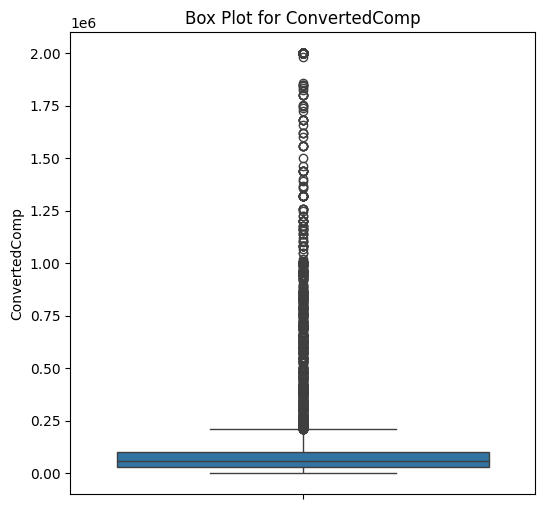

In [36]:
# your code goes here
fig, axes = plt.subplots(figsize=(6, 6))

# Box plot for 'price'
sns.boxplot(data=df, y='ConvertedComp', ax=axes)
axes.set_title('Box Plot for ConvertedComp')

Find out the Inter Quartile Range for the column `ConvertedComp`.


In [38]:
# your code goes here
Q1 = df['ConvertedComp'].quantile(0.25)
Q3 = df['ConvertedComp'].quantile(0.75)
IQR = Q3 - Q1
IQR

73132.0

Find out the upper and lower bounds.


In [40]:
# your code goes here
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print("Lower Bound:", lower_bound)
print("Upper Bound:", upper_bound)

Lower Bound: -82830.0
Upper Bound: 209698.0


Identify how many outliers are there in the `ConvertedComp` column.


In [42]:
# your code goes here
outliers = (df['ConvertedComp'] < lower_bound) | (df['ConvertedComp'] > upper_bound)
num_outliers = outliers.sum()
num_outliers

879

Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [44]:
# your code goes here
filtered_df = df[(df['ConvertedComp'] >= lower_bound) & (df['ConvertedComp'] <= upper_bound)]

print(f"Original DataFrame size: {df.shape}")
print(f"Filtered DataFrame size: {filtered_df.shape}")

Original DataFrame size: (11398, 86)
Filtered DataFrame size: (9703, 86)


In [45]:
filtered_df['ConvertedComp'].describe()

count      9703.000000
mean      59883.208389
std       43394.336755
min           0.000000
25%       24060.000000
50%       52704.000000
75%       85574.500000
max      209356.000000
Name: ConvertedComp, dtype: float64

## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [49]:
# your code goes here
num_columns = df.select_dtypes(include=['number']).columns
df[num_columns].corr()

,Respondent,CompTotal,ConvertedComp,WorkWeekHrs,CodeRevHrs,Age
Respondent,1.000000,-0.013490,0.002181,-0.015314,0.004621,0.004041
CompTotal,-0.013490,1.000000,0.001037,0.003510,0.007063,0.006970
ConvertedComp,0.002181,0.001037,1.000000,0.021143,-0.033865,0.105386
WorkWeekHrs,-0.015314,0.003510,0.021143,1.000000,0.026517,0.036518
CodeRevHrs,0.004621,0.007063,-0.033865,0.026517,1.000000,-0.020469
Age,0.004041,0.006970,0.105386,0.036518,-0.020469,1.000000


Text(0.5, 1.0, 'Box Plot for Age')

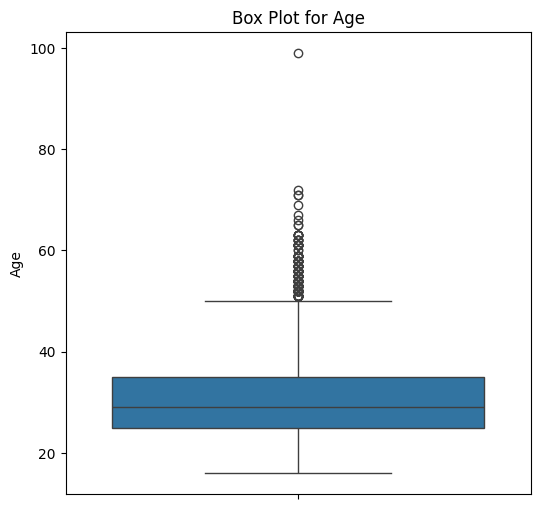

In [50]:
# your code goes here
fig, axes = plt.subplots(figsize=(6, 6))

# Box plot for 'price'
sns.boxplot(data=df, y='Age', ax=axes)
axes.set_title('Box Plot for Age')

In [51]:
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)
IQR = Q3 - Q1
IQR

10.0

In [52]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print("Lower Bound:", lower_bound)
print("Upper Bound:", upper_bound)

Lower Bound: 10.0
Upper Bound: 50.0


In [87]:
outliers = (df['Age'] < lower_bound)
num_outliers = outliers.sum()
num_outliers

0

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
